In [5]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [6]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [7]:
# add the latitudes and logitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities
cities=[]
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count.
len(cities)

609

In [9]:
# import the requests library
import requests

# import the API key
from config import weather_api_key

In [10]:
# Starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0132a1a5560f78db4653dca3b1034416


In [11]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 33.35,
  'feels_like': 26.49,
  'temp_min': 29.52,
  'temp_max': 36.45,
  'pressure': 1011,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 8.01, 'deg': 334, 'gust': 18.01},
 'clouds': {'all': 20},
 'dt': 1638226974,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1638186725,
  'sunset': 1638220417},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Get the JSON data.
boston_data = city_weather.json()

In [13]:
boston_data['sys']['country']

'US'

In [14]:
boston_data['dt']

1638226974

In [15]:
lat = boston_data['coord']['lat']
lon = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
min_temp = boston_data['main']['temp_min']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat, lon, max_temp, min_temp, humidity, clouds, wind)

42.3584 -71.0598 36.45 29.52 59 20 8.01


In [16]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [17]:
# Initialize counters and an empty list that will hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------


In [18]:
# Create counters
record_count = 1
set_count = 1

In [19]:
# Loop through the cities list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint url with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities:
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse Out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y, %m, %d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | umm kaddadah
Processing Record 3 of Set 1 | cofradia
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | ulladulla
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | puerto narino
Processing Record 12 of Set 1 | zhezkazgan
Processing Record 13 of Set 1 | aktash
Processing Record 14 of Set 1 | necochea
Processing Record 15 of Set 1 | namatanai
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | kutum
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | almaznyy
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | sistranda
Processing Record 23 of Set 1 | khonuu
City not found. Skipping...
Processing Record 24 of Set 1 | hudson

Processing Record 40 of Set 4 | koshurnikovo
Processing Record 41 of Set 4 | bundaberg
Processing Record 42 of Set 4 | camacha
Processing Record 43 of Set 4 | jawhar
Processing Record 44 of Set 4 | viedma
Processing Record 45 of Set 4 | margate
Processing Record 46 of Set 4 | marion
Processing Record 47 of Set 4 | belaya gora
Processing Record 48 of Set 4 | kimbe
Processing Record 49 of Set 4 | marawi
Processing Record 50 of Set 4 | yeppoon
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | cangucu
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | port hedland
Processing Record 5 of Set 5 | alexander city
Processing Record 6 of Set 5 | tidore
City not found. Skipping...
Processing Record 7 of Set 5 | srednekolymsk
Processing Record 8 of Set 5 | mariestad
Processing Record 9 of Set 5 | esperance
Processing Record 10 of Set 5 | bethel
Processing Record 11 of Set 5 | aklavik
Processing Record 12 of Set 5 | achisay
City not found. Skipping...
Proc

Processing Record 29 of Set 8 | tibati
Processing Record 30 of Set 8 | hargeysa
Processing Record 31 of Set 8 | beloha
Processing Record 32 of Set 8 | kurri kurri
Processing Record 33 of Set 8 | susurluk
Processing Record 34 of Set 8 | dunmore town
Processing Record 35 of Set 8 | jeremie
Processing Record 36 of Set 8 | zharkent
Processing Record 37 of Set 8 | mazatlan
Processing Record 38 of Set 8 | labuan
Processing Record 39 of Set 8 | khandbari
Processing Record 40 of Set 8 | temaraia
City not found. Skipping...
Processing Record 41 of Set 8 | north bend
Processing Record 42 of Set 8 | goroka
Processing Record 43 of Set 8 | chokurdakh
Processing Record 44 of Set 8 | aquiraz
Processing Record 45 of Set 8 | swift current
Processing Record 46 of Set 8 | mujiayingzi
Processing Record 47 of Set 8 | bismil
Processing Record 48 of Set 8 | kailua
Processing Record 49 of Set 8 | prokhorovka
Processing Record 50 of Set 8 | comodoro rivadavia
Processing Record 1 of Set 9 | iqaluit
Processing R

Processing Record 16 of Set 12 | thinadhoo
Processing Record 17 of Set 12 | warrenton
Processing Record 18 of Set 12 | baghdad
Processing Record 19 of Set 12 | cidreira
Processing Record 20 of Set 12 | karasjok
Processing Record 21 of Set 12 | mount gambier
Processing Record 22 of Set 12 | stettler
Processing Record 23 of Set 12 | akersberga
Processing Record 24 of Set 12 | price
Processing Record 25 of Set 12 | gazanjyk
Processing Record 26 of Set 12 | tunxi
City not found. Skipping...
Processing Record 27 of Set 12 | vao
Processing Record 28 of Set 12 | port hardy
Processing Record 29 of Set 12 | dillon
Processing Record 30 of Set 12 | waw
Processing Record 31 of Set 12 | harboore
Processing Record 32 of Set 12 | tukrah
Processing Record 33 of Set 12 | jardim
Processing Record 34 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 35 of Set 12 | itarema
Processing Record 36 of Set 12 | vanavara
Processing Record 37 of Set 12 | mizdah
Processing Record 38 of Set 12 

In [20]:
len(city_data)

556

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,31.17,68,58,1.99,US,"2021, 11, 29 23:04:39"
1,Umm Kaddadah,13.6017,26.6876,76.91,38,23,12.46,SD,"2021, 11, 29 23:04:39"
2,Cofradia,15.4000,-88.1500,76.08,87,31,2.28,HN,"2021, 11, 29 23:04:40"
3,Punta Arenas,-53.1500,-70.9167,51.12,43,95,19.06,CL,"2021, 11, 29 23:01:33"
4,Kapaa,22.0752,-159.3190,84.18,67,40,5.99,US,"2021, 11, 29 23:04:40"
5,Ulladulla,-35.3500,150.4667,70.88,68,67,6.08,AU,"2021, 11, 29 23:04:41"
6,Ushuaia,-54.8000,-68.3000,43.92,58,23,8.03,AR,"2021, 11, 29 23:01:37"
7,Rikitea,-23.1203,-134.9692,76.46,76,2,21.07,PF,"2021, 11, 29 23:04:41"
8,Busselton,-33.6500,115.3333,59.04,58,43,10.13,AU,"2021, 11, 29 23:04:42"
9,Mataura,-46.1927,168.8643,58.48,53,98,4.50,NZ,"2021, 11, 29 23:01:16"


In [22]:
# Reorder the columns to make it easier to read
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,"2021, 11, 29 23:04:39",42.6001,-73.9662,31.17,68,58,1.99
1,Umm Kaddadah,SD,"2021, 11, 29 23:04:39",13.6017,26.6876,76.91,38,23,12.46
2,Cofradia,HN,"2021, 11, 29 23:04:40",15.4000,-88.1500,76.08,87,31,2.28
3,Punta Arenas,CL,"2021, 11, 29 23:01:33",-53.1500,-70.9167,51.12,43,95,19.06
4,Kapaa,US,"2021, 11, 29 23:04:40",22.0752,-159.3190,84.18,67,40,5.99


In [23]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"
# export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract the relevent data from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module
import time
# Get today's date in seconds
today = time.time()
today

1638228015.4219468

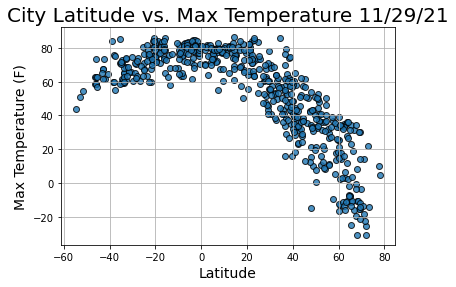

In [26]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"), fontsize=20)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

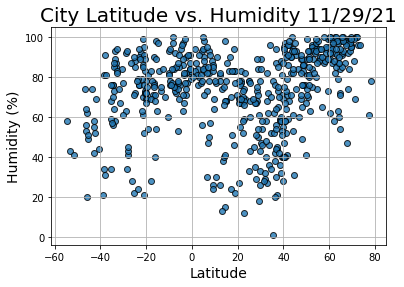

In [27]:
# Create a scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", alpha=0.8, linewidths=1,
           marker="o", label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"), fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

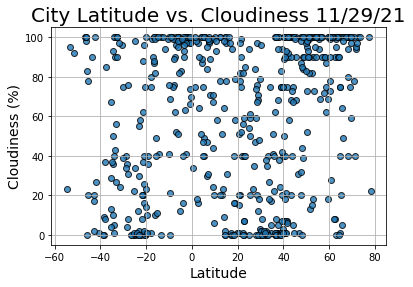

In [28]:
# Create a scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", alpha=0.8, linewidths=1,
           marker="o", label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"), fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

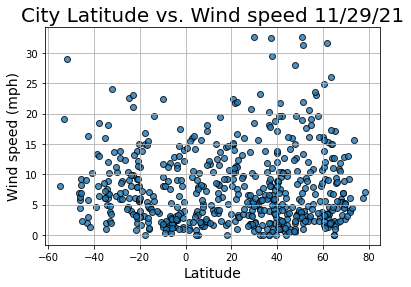

In [29]:
# Create a scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", alpha=0.8, linewidths=1,
           marker="o", label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind speed " + time.strftime("%x"), fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind speed (mph)", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()

# Find the correlation between latitude and maximum temperature

In [ ]:
# Import linear regression from the Scipy stats module
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data

In [35]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on himisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line in the "y_values" based on slope and intercept
    regress_values = x_values*slope+intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create the hemisphere dataframes

In [36]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

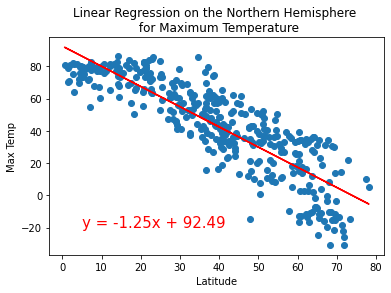

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
chart_title = "Linear Regression on the Northern Hemisphere \n for Maximum Temperature"

# Call the function
plot_linear_regression(x_values, y_values, chart_title, 'Max Temp',(5,-20))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

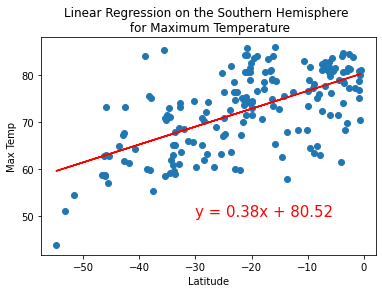

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
chart_title = "Linear Regression on the Southern Hemisphere \n for Maximum Temperature"

# Call the function
plot_linear_regression(x_values, y_values, chart_title, 'Max Temp',(-30,50))

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

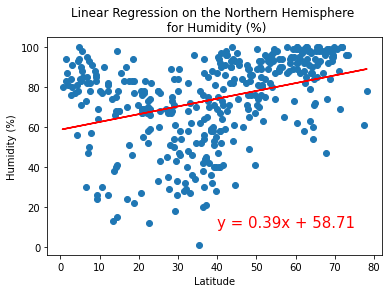

In [79]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
chart_title= "Linear Regression on the Northern Hemisphere \n for Humidity (%)"

plot_linear_regression(x_values, y_values, chart_title, 'Humidity (%)', (40,10))

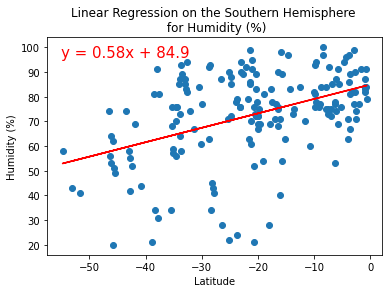

In [88]:
### Perform Linear REgression on the Humidity % for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
chart_title= "Linear Regression on the Southern Hemisphere \n for Humidity (%)"

plot_linear_regression(x_values, y_values, chart_title, 'Humidity (%)', (-55,96))

# Find the correlation between Latitude and the Cloudiness %

### Perform Linear Regression on the Cloudiness % for the Northern Hemisphere

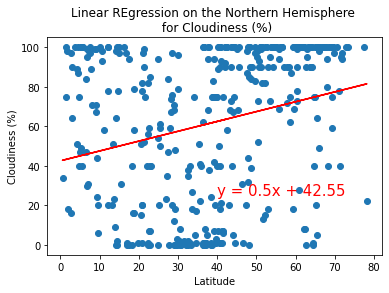

In [90]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
chart_title = "Linear Regression on the Northern Hemisphere \n for Cloudiness (%)"

plot_linear_regression(x_values, y_values, chart_title, 'Cloudiness (%)', (40,25))

### Perform linear regression on the cloudiness % for the Southern Hemisphere

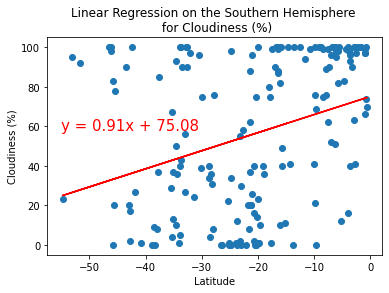

In [93]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
chart_title = "Linear Regression on the Southern Hemisphere \n for Cloudiness (%)"

plot_linear_regression(x_values, y_values, chart_title, 'Cloudiness (%)', (-55,58))

# Find the Correlation Between Latitude and Wind Speed

### Perform Linear Regression on the wind speed for the northern Hemisphere

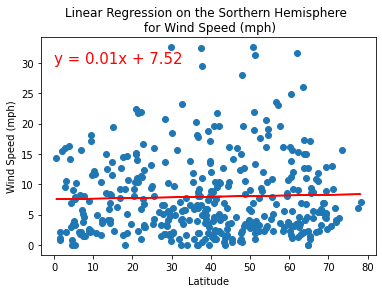

In [95]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
chart_title = "Linear Regression on the Sorthern Hemisphere \n for Wind Speed (mph)"

plot_linear_regression(x_values, y_values, chart_title, 'Wind Speed (mph)', (0,30))

### Perform Linear Regression on the wind speed for the Southern Hemisphere

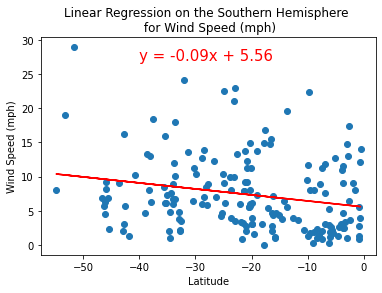

In [100]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
chart_title = "Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)"

plot_linear_regression(x_values, y_values, chart_title, 'Wind Speed (mph)', (-40,27))